In [1]:
import pandas as pd
import matplotlib.pyplot as plt


election = pd.read_csv('pennsylvania2012_turnout.csv',index_col='county')
election.head()

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118


In [2]:
# Assign the row position of election.loc['Bedford']: x
x = 4

# Assign the column position of election['winner']: y
y = 4

# Print the boolean equivalence
print(election.iloc[x, y] == election.loc['Bedford', 'winner'])


True


In [3]:
# Create a separate dataframe with the columns ['winner', 'total', 'voters']: results
results = election[['winner', 'total', 'voters']]

# Print the output of results.head()
print(results.head())


           winner   total  voters
county                           
Adams      Romney   41973   61156
Allegheny   Obama  614671  924351
Armstrong  Romney   28322   42147
Beaver     Romney   80015  115157
Bedford    Romney   21444   32189


In [4]:
# Slice the row labels 'Perry' to 'Potter': p_counties
p_counties = election.loc['Perry' : 'Potter']

# Print the p_counties DataFrame
print(p_counties)

             state   total      Obama     Romney  winner   voters    turnout  \
county                                                                         
Perry           PA   18240  29.769737  68.591009  Romney    27245  66.948064   
Philadelphia    PA  653598  85.224251  14.051451   Obama  1099197  59.461407   
Pike            PA   23164  43.904334  54.882576  Romney    41840  55.363289   
Potter          PA    7205  26.259542  72.158223  Romney    10913  66.022175   

                 margin  
county                   
Perry         38.821272  
Philadelphia  71.172800  
Pike          10.978242  
Potter        45.898681  


In [5]:
# Slice the row labels 'Potter' to 'Perry' in reverse order: p_counties_rev
p_counties_rev = election.loc['Potter':'Perry': -1] 

# Print the p_counties_rev DataFrame
print(p_counties_rev)


             state   total      Obama     Romney  winner   voters    turnout  \
county                                                                         
Potter          PA    7205  26.259542  72.158223  Romney    10913  66.022175   
Pike            PA   23164  43.904334  54.882576  Romney    41840  55.363289   
Philadelphia    PA  653598  85.224251  14.051451   Obama  1099197  59.461407   
Perry           PA   18240  29.769737  68.591009  Romney    27245  66.948064   

                 margin  
county                   
Potter        45.898681  
Pike          10.978242  
Philadelphia  71.172800  
Perry         38.821272  


In [6]:
# Slice the columns from the starting column to 'Obama': left_columns
left_columns = election.loc[:,:'Obama']

# Print the output of left_columns.head()
print(left_columns.head())

# Slice the columns from 'Obama' to 'winner': middle_columns
middle_columns = election.loc[:,'Obama':'winner']

# Print the output of middle_columns.head()
print(middle_columns.head())

# Slice the columns from 'Romney' to the end: 'right_columns'
right_columns = election.loc[:,'Romney':] 

# Print the output of right_columns.head()
print(right_columns.head())

          state   total      Obama
county                            
Adams        PA   41973  35.482334
Allegheny    PA  614671  56.640219
Armstrong    PA   28322  30.696985
Beaver       PA   80015  46.032619
Bedford      PA   21444  22.057452
               Obama     Romney  winner
county                                 
Adams      35.482334  63.112001  Romney
Allegheny  56.640219  42.185820   Obama
Armstrong  30.696985  67.901278  Romney
Beaver     46.032619  52.637630  Romney
Bedford    22.057452  76.986570  Romney
              Romney  winner  voters    turnout     margin
county                                                    
Adams      63.112001  Romney   61156  68.632677  27.629667
Allegheny  42.185820   Obama  924351  66.497575  14.454399
Armstrong  67.901278  Romney   42147  67.198140  37.204293
Beaver     52.637630  Romney  115157  69.483401   6.605012
Bedford    76.986570  Romney   32189  66.619031  54.929118


In [7]:
# Create the list of row labels: rows
rows = ['Philadelphia', 'Centre', 'Fulton']

# Create the list of column labels: cols
cols =  ['winner', 'Obama', 'Romney']

# Create the new DataFrame: three_counties
three_counties = election.loc[rows,cols]

# Print the three_counties DataFrame
print(three_counties)


              winner      Obama     Romney
county                                    
Philadelphia   Obama  85.224251  14.051451
Centre        Romney  48.948416  48.977486
Fulton        Romney  21.096291  77.748861


In [8]:
# Create the boolean array: high_turnout
high_turnout = election['turnout'] > 70

# Filter the election DataFrame with the high_turnout array: high_turnout_df
high_turnout_df = election[high_turnout]

# Print the high_turnout_results DataFrame
print(high_turnout_df)


             state   total      Obama     Romney  winner  voters    turnout  \
county                                                                        
Bucks           PA  319407  49.966970  48.801686   Obama  435606  73.324748   
Butler          PA   88924  31.920516  66.816607  Romney  122762  72.436096   
Chester         PA  248295  49.228539  49.650617  Romney  337822  73.498766   
Forest          PA    2308  38.734835  59.835355  Romney    3232  71.410891   
Franklin        PA   62802  30.110506  68.583803  Romney   87406  71.850903   
Montgomery      PA  401787  56.637223  42.286834   Obama  551105  72.905708   
Westmoreland    PA  168709  37.567646  61.306154  Romney  238006  70.884347   

                 margin  
county                   
Bucks          1.165284  
Butler        34.896091  
Chester        0.422079  
Forest        21.100520  
Franklin      38.473297  
Montgomery    14.350390  
Westmoreland  23.738508  


In [9]:
# Import numpy
import numpy as np

# Create the boolean array: too_close
too_close = election['margin'] < 1

# Assign np.nan to the 'winner' column where the results were too close to call
election.winner[too_close] = np.nan

# Print the output of election.info()
print(election.info())

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, Adams to York
Data columns (total 8 columns):
state      67 non-null object
total      67 non-null int64
Obama      67 non-null float64
Romney     67 non-null float64
winner     64 non-null object
voters     67 non-null int64
turnout    67 non-null float64
margin     67 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 4.7+ KB
None


/home/bat/anaconda2/envs/Python-3/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
titanic = pd.read_csv('titanic2.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [12]:
# Select the 'age' and 'cabin' columns: df
df = titanic[['age','cabin']]

# Print the shape of df
print(df.shape)


(1309, 2)


In [13]:
df.head()

,age,cabin
0,29.00,B5
1,0.92,C22 C26
2,2.00,C22 C26
3,30.00,C22 C26
4,25.00,C22 C26


In [14]:
# Drop rows in df with how='any' and print the shape
print(df.dropna(how='any').shape)
df.dropna(how='any').head()

(272, 2)


,age,cabin
0,29.00,B5
1,0.92,C22 C26
2,2.00,C22 C26
3,30.00,C22 C26
4,25.00,C22 C26


In [15]:
# Drop rows in df with how='all' and print the shape
print(df.dropna(how='all').shape)
df.dropna(how='all').head()


(1069, 2)


,age,cabin
0,29.00,B5
1,0.92,C22 C26
2,2.00,C22 C26
3,30.00,C22 C26
4,25.00,C22 C26


In [17]:
weather  = pd.read_csv('pittsburgh2013.csv')
weather.head()

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,Mean Dew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2013-1-1,32,28,21,30,27,16,100,89,77,...,10,6,2,10,8,NaN,0.00,8,Snow,277
1,2013-1-2,25,21,17,14,12,10,77,67,55,...,10,10,10,14,5,NaN,0.00,4,NaN,272
2,2013-1-3,32,24,16,19,15,9,77,67,56,...,10,10,10,17,8,26.0,0.00,3,NaN,229
3,2013-1-4,30,28,27,21,19,17,75,68,59,...,10,10,6,23,16,32.0,0.00,4,NaN,250
4,2013-1-5,34,30,25,23,20,16,75,68,61,...,10,10,10,16,10,23.0,0.21,5,NaN,221


In [18]:
# Write a function to convert degrees Fahrenheit to degrees Celsius: to_celsius
def to_celsius(F):
    return 5/9*(F - 32)

# Apply the function over 'Mean TemperatureF' and 'Mean Dew PointF': df_celsius
df_celsius = weather[['Mean TemperatureF', 'Mean Dew PointF']].apply(to_celsius) 

# Reassign the columns df_celsius
df_celsius.columns = ['Mean TemperatureC', 'Mean Dew PointC']

# Print the output of df_celsius.head()
print(df_celsius.head())


   Mean TemperatureC  Mean Dew PointC
0          -2.222222        -2.777778
1          -6.111111       -11.111111
2          -4.444444        -9.444444
3          -2.222222        -7.222222
4          -1.111111        -6.666667


In [19]:
# Create the dictionary: red_vs_blue
red_vs_blue = {'Obama':'blue','Romney':'red'}

# Use the dictionary to map the 'winner' column to the new column: election['color']
election['color'] = election.winner.map(red_vs_blue)

# Print the output of election.head()
print(election.head())


          state   total      Obama     Romney  winner  voters    turnout  \
county                                                                     
Adams        PA   41973  35.482334  63.112001  Romney   61156  68.632677   
Allegheny    PA  614671  56.640219  42.185820   Obama  924351  66.497575   
Armstrong    PA   28322  30.696985  67.901278  Romney   42147  67.198140   
Beaver       PA   80015  46.032619  52.637630  Romney  115157  69.483401   
Bedford      PA   21444  22.057452  76.986570  Romney   32189  66.619031   

              margin color  
county                      
Adams      27.629667   red  
Allegheny  14.454399  blue  
Armstrong  37.204293   red  
Beaver      6.605012   red  
Bedford    54.929118   red  


In [20]:
# Import zscore from scipy.stats
from scipy.stats import zscore

# Call zscore with election['turnout'] as input: turnout_zscore
turnout_zscore = zscore(election['turnout'])

# Print the type of turnout_zscore
print(type(turnout_zscore))

# Assign turnout_zscore to a new column: election['turnout_zscore']
election['turnout_zscore'] = turnout_zscore

# Print the output of election.head()
print(election.head())


<class 'numpy.ndarray'>
          state   total      Obama     Romney  winner  voters    turnout  \
county                                                                     
Adams        PA   41973  35.482334  63.112001  Romney   61156  68.632677   
Allegheny    PA  614671  56.640219  42.185820   Obama  924351  66.497575   
Armstrong    PA   28322  30.696985  67.901278  Romney   42147  67.198140   
Beaver       PA   80015  46.032619  52.637630  Romney  115157  69.483401   
Bedford      PA   21444  22.057452  76.986570  Romney   32189  66.619031   

              margin color  turnout_zscore  
county                                      
Adams      27.629667   red        0.853734  
Allegheny  14.454399  blue        0.439846  
Armstrong  37.204293   red        0.575650  
Beaver      6.605012   red        1.018647  
Bedford    54.929118   red        0.463391  


In [22]:
sales = pd.read_csv('sales.csv')
sales

,month,eggs,salt,spam
0,Jan,47,12.0,17
1,Feb,110,50.0,31
2,Mar,221,89.0,72
3,Apr,77,87.0,20
4,May,132,NaN,52
5,Jun,205,60.0,55


In [23]:
# Generate the list of months: months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

# Assign months to sales.index
sales.index = months


# Create the list of new indexes: new_idx
new_idx = [h.upper() for h in sales.index]

# Assign new_idx to sales.index
sales.index = new_idx

# Print the sales DataFrame
print(sales)


    month  eggs  salt  spam
JAN   Jan    47  12.0    17
FEB   Feb   110  50.0    31
MAR   Mar   221  89.0    72
APR   Apr    77  87.0    20
MAY   May   132   NaN    52
JUN   Jun   205  60.0    55


In [24]:
# Assign the string 'MONTHS' to sales.index.name
sales.index.name = 'MONTHS'

# Print the sales DataFrame
print(sales)

# Assign the string 'PRODUCTS' to sales.columns.name 
sales.columns.name = 'PRODUCTS'

# Print the sales dataframe again
print(sales)


       month  eggs  salt  spam
MONTHS                        
JAN      Jan    47  12.0    17
FEB      Feb   110  50.0    31
MAR      Mar   221  89.0    72
APR      Apr    77  87.0    20
MAY      May   132   NaN    52
JUN      Jun   205  60.0    55
PRODUCTS month  eggs  salt  spam
MONTHS                          
JAN        Jan    47  12.0    17
FEB        Feb   110  50.0    31
MAR        Mar   221  89.0    72
APR        Apr    77  87.0    20
MAY        May   132   NaN    52
JUN        Jun   205  60.0    55


In [26]:
sales = pd.read_csv('sales1.csv')

# Set the index to the column 'state': sales
sales = sales.set_index('state')

# Print the sales DataFrame
print(sales)

# Access the data from 'NY'
print(sales.loc['NY'])


       month  eggs  salt  spam
state                         
CA         1    47  12.0    17
CA         2   110  50.0    31
NY         1   221  89.0    72
NY         2    77  87.0    20
TX         1   132   NaN    52
TX         2   205  60.0    55
       month  eggs  salt  spam
state                         
NY         1   221  89.0    72
NY         2    77  87.0    20


In [27]:
sales = pd.read_csv('sales1.csv')

# Set the index to be the columns ['state', 'month']: sales
sales = sales.set_index(['state', 'month'])

# Sort the MultiIndex: sales
sales = sales.sort_index()

# Print the sales DataFrame
print(sales)

             eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
NY    1       221  89.0    72
      2        77  87.0    20
TX    1       132   NaN    52
      2       205  60.0    55


In [28]:
# Look up data for NY in month 1: NY_month1
NY_month1 = sales.loc[('NY',1)]

# Look up data for CA and TX in month 2: CA_TX_month2
CA_TX_month2 = sales.loc[(['CA','TX'],2),:]

# Look up data for all states in month 2: all_month2
all_month2 =sales.loc[(slice(None),2),:]


In [29]:
users = pd.read_csv('users.csv')
users.head()

,Unnamed: 0,weekday,city,visitors,signups
0,0,Sun,Austin,139,7
1,1,Sun,Dallas,237,12
2,2,Mon,Austin,326,3
3,3,Mon,Dallas,456,5


In [30]:
# Pivot the users DataFrame: visitors_pivot
visitors_pivot = users.pivot(index='weekday',columns='city',values='visitors')

# Print the pivoted DataFrame
print(visitors_pivot)


city     Austin  Dallas
weekday                
Mon         326     456
Sun         139     237


In [31]:
# Pivot users with signups indexed by weekday and city: signups_pivot
signups_pivot = users.pivot(index='weekday',columns='city',values='signups')

# Print signups_pivot
print(signups_pivot)

# Pivot users pivoted by both signups and visitors: pivot
pivot = users.pivot(index='weekday',columns='city')

# Print the pivoted DataFrame
print(pivot)


city     Austin  Dallas
weekday                
Mon           3       5
Sun           7      12
        Unnamed: 0        visitors        signups       
city        Austin Dallas   Austin Dallas  Austin Dallas
weekday                                                 
Mon              2      3      326    456       3      5
Sun              0      1      139    237       7     12


In [32]:
new_user = users.set_index(['city','weekday'])
new_user

,,Unnamed: 0,visitors,signups
city,weekday,,,
Austin,Sun,0,139,7
Dallas,Sun,1,237,12
Austin,Mon,2,326,3
Dallas,Mon,3,456,5


In [33]:
# Unstack users by 'weekday': byweekday
byweekday = users.unstack(level = 'weekday')

# Print the byweekday DataFrame
print(byweekday)

# Stack byweekday by 'weekday' and print it
# print(byweekday.stack(level = 'weekday'))

Unnamed: 0  0         0
            1         1
            2         2
            3         3
weekday     0       Sun
            1       Sun
            2       Mon
            3       Mon
city        0    Austin
            1    Dallas
            2    Austin
            3    Dallas
visitors    0       139
            1       237
            2       326
            3       456
signups     0         7
            1        12
            2         3
            3         5
dtype: object


In [34]:
# Stack 'city' back into the index of bycity: newusers
# newusers = bycity.stack(level='city')

# Swap the levels of the index of newusers: newusers
# newusers = newusers.swaplevel(0,1)

# Print newusers and verify that the index is not sorted
# print(newusers)

# Sort the index of newusers: newusers
# newusers = newusers.sort_index()

# Print newusers and verify that the index is now sorted
# print(newusers)

# Verify that the new DataFrame is equal to the original
# print(newusers.equals(users))

In [37]:
# Reset the index: visitors_by_city_weekday
# visitors_by_city_weekday = visitors_by_city_weekday.reset_index()

# Print visitors_by_city_weekday
# print(visitors_by_city_weekday)

# Melt visitors_by_city_weekday: visitors
# visitors = pd.melt(visitors_by_city_weekday, id_vars='weekday', value_name='visitors')

# Print visitors
# print(visitors)


In [38]:
# Melt users: skinny
skinny = pd.melt(users,id_vars=['weekday','city'])

# Print skinny
print(skinny)


   weekday    city    variable  value
0      Sun  Austin  Unnamed: 0      0
1      Sun  Dallas  Unnamed: 0      1
2      Mon  Austin  Unnamed: 0      2
3      Mon  Dallas  Unnamed: 0      3
4      Sun  Austin    visitors    139
5      Sun  Dallas    visitors    237
6      Mon  Austin    visitors    326
7      Mon  Dallas    visitors    456
8      Sun  Austin     signups      7
9      Sun  Dallas     signups     12
10     Mon  Austin     signups      3
11     Mon  Dallas     signups      5


In [39]:
# Group titanic by 'pclass'
by_class = titanic.groupby('pclass')

# Aggregate 'survived' column of by_class by count
count_by_class = by_class['survived'].count()

# Print count_by_class
print(count_by_class)

# Group titanic by 'embarked' and 'pclass'
by_mult = titanic.groupby(['embarked','pclass'])

# Aggregate 'survived' column of by_mult by count
count_mult = by_mult['survived'].count()

# Print count_mult
print(count_mult)

pclass
1    323
2    277
3    709
Name: survived, dtype: int64
embarked  pclass
C         1         141
          2          28
          3         101
Q         1           3
          2           7
          3         113
S         1         177
          2         242
          3         495
Name: survived, dtype: int64


In [40]:
 life_fname= 'life_expectancy.csv'

# Read life_fname into a DataFrame: life
life = pd.read_csv(life_fname, index_col='Country')
life.head()

,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.639,34.152,34.662,35.170,35.674,36.172,36.663,37.143,37.614,38.075,...,56.583,57.071,57.582,58.102,58.618,59.124,59.612,60.079,60.524,60.947
Albania,65.475,65.863,66.122,66.316,66.500,66.702,66.948,67.251,67.595,67.966,...,75.725,75.949,76.124,76.278,76.433,76.598,76.780,76.979,77.185,77.392
Algeria,47.953,48.389,48.806,49.205,49.592,49.976,50.366,50.767,51.195,51.670,...,69.682,69.854,70.020,70.180,70.332,70.477,70.615,70.747,70.874,71.000
Angola,34.604,35.007,35.410,35.816,36.222,36.627,37.032,37.439,37.846,38.247,...,48.036,48.572,49.041,49.471,49.882,50.286,50.689,51.094,51.498,51.899
Antigua and Barbuda,63.775,64.149,64.511,64.865,65.213,65.558,65.898,66.232,66.558,66.875,...,74.355,74.544,74.729,74.910,75.087,75.263,75.437,75.610,75.783,75.954


In [42]:
regions_fname = 'regions.csv'
# Read regions_fname into a DataFrame: regions
regions = pd.read_csv(regions_fname)
regions.head()

,Country,region
0,Afghanistan,South Asia
1,Albania,Europe & Central Asia
2,Algeria,Middle East & North Africa
3,Angola,Sub-Saharan Africa
4,Antigua and Barbuda,America


In [44]:
# Read life_fname into a DataFrame: life
life = pd.read_csv(life_fname, index_col='Country')

# Read regions_fname into a DataFrame: regions
regions = pd.read_csv(regions_fname,index_col='Country')

# Group life by regions['region']: life_by_region
life_by_region = life.groupby(regions['region'])

# Print the mean over the '2010' column of life_by_region
print(life_by_region['2010'].mean())


region
America                       74.037350
East Asia & Pacific           73.405750
Europe & Central Asia         75.656387
Middle East & North Africa    72.805333
South Asia                    68.189750
Sub-Saharan Africa            57.575080
Name: 2010, dtype: float64


In [45]:
# Group titanic by 'pclass': by_class
by_class = titanic.groupby('pclass')

# Select 'age' and 'fare'
by_class_sub = by_class[['age','fare']]

# Aggregate by_class_sub by 'max' and 'median': aggregated
aggregated = by_class_sub.agg(['max','median'])

# Print the maximum age in each class
print(aggregated.loc[:, ('age','max')])

# Print the median fare in each class
print(aggregated.loc[:,('fare','median')])

pclass
1    80.0
2    70.0
3    74.0
Name: (age, max), dtype: float64
pclass
1    60.0000
2    15.0458
3     8.0500
Name: (fare, median), dtype: float64


In [50]:
aggregated.head()

age             fare         
         max median       max   median
pclass                                
1       80.0   39.0  512.3292  60.0000
2       70.0   29.0   73.5000  15.0458
3       74.0   24.0   69.5500   8.0500

In [60]:
# Read the CSV file into a DataFrame and sort the index: gapminder
gapminder = pd.read_csv('gapminder1.csv',index_col=['Year','region','Country']).sort_index()

# Group gapminder by 'Year' and 'region': by_year_region
by_year_region = gapminder.groupby(level=['Year' , 'region'])

# Define the function to compute spread: spread
def spread(series):
    return series.max() - series.min()

# Create the dictionary: aggregator
aggregator = {'population':'sum', 'child_mortality':'mean', 'gdp':spread}

# Aggregate by_year_region using the dictionary: aggregated
aggregated = by_year_region.agg(aggregator)

# Print the last 6 entries of aggregated 
print(aggregated.tail(6))

                                 child_mortality       gdp    population
Year region                                                             
2013 America                           17.745833   49634.0  9.629087e+08
     East Asia & Pacific               22.285714  134744.0  2.244209e+09
     Europe & Central Asia              9.831875   86418.0  8.968788e+08
     Middle East & North Africa        20.221500  128676.0  4.030504e+08
     South Asia                        46.287500   11469.0  1.701241e+09
     Sub-Saharan Africa                76.944490   32035.0  9.205996e+08


In [73]:
# Read file: sales
sales = pd.read_csv('sales3.csv',index_col='Date',parse_dates=True)

# Create a groupby object: by_day
by_day = sales.groupby(sales.index.strftime('%a'))

# Create sum: units_sum
units_sum = by_day['Units'].sum()

# Print units_sum
print(units_sum)

Mon    48
Sat     7
Thu    59
Tue    13
Wed    48
Name: Units, dtype: int64


In [76]:
gapminder_2010 = pd.read_csv('gapminder_2010.csv',index_col='Country')
gapminder_2010.head()

,fertility,life,population,child_mortality,gdp,region
Country,,,,,,
Afghanistan,5.659,59.612,31411743.0,105.0,1637.0,South Asia
Albania,1.741,76.780,3204284.0,16.6,9374.0,Europe & Central Asia
Algeria,2.817,70.615,35468208.0,27.4,12494.0,Middle East & North Africa
Angola,6.218,50.689,19081912.0,182.5,7047.0,Sub-Saharan Africa
Antigua and Barbuda,2.130,75.437,88710.0,9.9,20567.0,America


In [77]:
# Import zscore
from scipy.stats import zscore

# Group gapminder_2010: standardized
standardized = gapminder_2010.groupby('region')['life','fertility'].transform(zscore)

# Construct a Boolean Series to identify outliers: outliers
outliers = (standardized['life'] < -3) |( standardized['fertility'] > 3 )

# Filter gapminder_2010 by the outliers: gm_outliers
gm_outliers = gapminder_2010.loc[outliers]

# Print gm_outliers
print(gm_outliers)

             fertility    life  population  child_mortality     gdp  \
Country                                                               
Guatemala        3.974  71.100  14388929.0             34.5  6849.0   
Haiti            3.350  45.000   9993247.0            208.8  1518.0   
Tajikistan       3.780  66.830   6878637.0             52.6  2110.0   
Timor-Leste      6.237  65.952   1124355.0             63.8  1777.0   

                            region  
Country                             
Guatemala                  America  
Haiti                      America  
Tajikistan   Europe & Central Asia  
Timor-Leste    East Asia & Pacific  


In [78]:
# Create a groupby object: by_sex_class
by_sex_class = titanic.groupby(['sex','pclass'])

# Write a function that imputes median
def impute_median(series):
    return series.fillna(series.median())

# Impute age and assign to titanic['age']
titanic.age = by_sex_class.age.transform(impute_median)

# Print the output of titanic.tail(10)
print(titanic.tail(10))

      pclass  survived                                     name     sex   age  \
1299       3         0                      Yasbeck, Mr. Antoni    male  27.0   
1300       3         1  Yasbeck, Mrs. Antoni (Selini Alexander)  female  15.0   
1301       3         0                     Youseff, Mr. Gerious    male  45.5   
1302       3         0                        Yousif, Mr. Wazli    male  25.0   
1303       3         0                    Yousseff, Mr. Gerious    male  25.0   
1304       3         0                     Zabour, Miss. Hileni  female  14.5   
1305       3         0                    Zabour, Miss. Thamine  female  22.0   
1306       3         0                Zakarian, Mr. Mapriededer    male  26.5   
1307       3         0                      Zakarian, Mr. Ortin    male  27.0   
1308       3         0                       Zimmerman, Mr. Leo    male  29.0   

      sibsp  parch  ticket     fare cabin embarked boat   body home.dest  
1299      1      0    2659  14.45

In [80]:
def disparity(gr):
    # Compute the spread of gr['gdp']: s
    s = gr['gdp'].max() - gr['gdp'].min()
    # Compute the z-score of gr['gdp'] as (gr['gdp']-gr['gdp'].mean())/gr['gdp'].std(): z
    z = (gr['gdp'] - gr['gdp'].mean())/gr['gdp'].std()
    # Return a DataFrame with the inputs {'z(gdp)':z, 'regional spread(gdp)':s}
    return pd.DataFrame({'z(gdp)':z , 'regional spread(gdp)':s})


In [81]:
# Group gapminder_2010 by 'region': regional
regional = gapminder_2010.groupby('region')

# Apply the disparity function on regional: reg_disp
reg_disp = regional.apply(disparity)

# Print the disparity of 'United States', 'United Kingdom', and 'China'
print(reg_disp.loc[['United States','United Kingdom','China']])


                regional spread(gdp)    z(gdp)
Country                                       
United States                47855.0  3.013374
United Kingdom               89037.0  0.572873
China                        96993.0 -0.432756


In [82]:
def c_deck_survival(gr):

    c_passengers = gr['cabin'].str.startswith('C').fillna(False)

    return gr.loc[c_passengers, 'survived'].mean()

In [83]:
# Create a groupby object using titanic over the 'sex' column: by_sex
by_sex = titanic.groupby('sex')

# Call by_sex.apply with the function c_deck_survival and print the result
c_surv_by_sex = by_sex.apply(c_deck_survival)

# Print the survival rates
print(c_surv_by_sex)

sex
female    0.913043
male      0.312500
dtype: float64


In [84]:
# Read the CSV file into a DataFrame: sales
sales = pd.read_csv('sales3.csv', index_col='Date', parse_dates=True)

# Group sales by 'Company': by_company
by_company = sales.groupby('Company')

# Compute the sum of the 'Units' of by_company: by_com_sum
by_com_sum = by_company['Units'].sum()
print(by_com_sum)

# Filter 'Units' where the sum is > 35: by_com_filt
by_com_filt = by_company.filter( lambda g: g['Units'].sum() > 35)
print(by_com_filt)


Company
Acme Coporation    34
Hooli              30
Initech            30
Mediacore          45
Streeplex          36
Name: Units, dtype: int64
                       Company   Product  Units
Date                                           
2015-02-02 21:00:00  Mediacore  Hardware      9
2015-02-04 15:30:00  Streeplex  Software     13
2015-02-09 09:00:00  Streeplex   Service     19
2015-02-09 13:00:00  Mediacore  Software      7
2015-02-19 11:00:00  Mediacore  Hardware     16
2015-02-19 16:00:00  Mediacore   Service     10
2015-02-21 05:00:00  Mediacore  Software      3
2015-02-26 09:00:00  Streeplex   Service      4


In [85]:
# Create the Boolean Series: under10
under10 = (titanic['age'] < 10).map({True:'under 10', False:'over 10'})

# Group by under10 and compute the survival rate
survived_mean_1 = titanic.groupby(under10)['survived'].mean()
print(survived_mean_1)

# Group by under10 and pclass and compute the survival rate
survived_mean_2 = titanic.groupby([under10, 'pclass'])['survived'].mean()
print(survived_mean_2)


age
over 10     0.366748
under 10    0.609756
Name: survived, dtype: float64
age       pclass
over 10   1         0.617555
          2         0.380392
          3         0.238897
under 10  1         0.750000
          2         1.000000
          3         0.446429
Name: survived, dtype: float64


In [86]:
medals = pd.read_csv('all_medalists.csv')
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [88]:

# Select the 'NOC' column of medals: country_names
country_names = medals['NOC']

# Count the number of medals won by each country: medal_counts
medal_counts = country_names.value_counts()

# Print top 15 countries ranked by medals
print(medal_counts.head(15))


USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64


In [89]:
# Construct the pivot table: counted
counted = medals.pivot_table(index='NOC', values='Athlete', columns='Medal', aggfunc='count')

# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis='columns')

# Sort counted by the 'totals' column
counted = counted.sort_values('totals', ascending=False)

# Print the top 15 rows of counted
print(counted.head(15))

Medal  Bronze    Gold  Silver  totals
NOC                                  
USA    1052.0  2088.0  1195.0  4335.0
URS     584.0   838.0   627.0  2049.0
GBR     505.0   498.0   591.0  1594.0
FRA     475.0   378.0   461.0  1314.0
ITA     374.0   460.0   394.0  1228.0
GER     454.0   407.0   350.0  1211.0
AUS     413.0   293.0   369.0  1075.0
HUN     345.0   400.0   308.0  1053.0
SWE     325.0   347.0   349.0  1021.0
GDR     225.0   329.0   271.0   825.0
NED     320.0   212.0   250.0   782.0
JPN     270.0   206.0   228.0   704.0
CHN     193.0   234.0   252.0   679.0
RUS     240.0   192.0   206.0   638.0
ROU     282.0   155.0   187.0   624.0


In [90]:
# Select columns: ev_gen
ev_gen = medals[['Event_gender','Gender']]

# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

# Print ev_gen_uniques
print(ev_gen_uniques)

      Event_gender Gender
0                M    Men
348              X    Men
416              W  Women
639              X  Women
23675            W    Men


In [91]:
# Group medals by the two columns: medals_by_gender
medals_by_gender = medals.groupby(['Event_gender','Gender'])

# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = medals_by_gender.count()

# Print medal_count_by_gender
print(medal_count_by_gender)

                      City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218  


In [92]:
# Create the Boolean Series: sus
sus = (medals.Event_gender == 'W') & (medals.Gender=='Men')

# Create a DataFrame with the suspicious row: suspect
suspect = medals[sus]

# Print suspect
print(suspect)

         City  Edition      Sport Discipline            Athlete  NOC Gender  \
23675  Sydney     2000  Athletics  Athletics  CHEPCHUMBA, Joyce  KEN    Men   

          Event Event_gender   Medal  
23675  marathon            W  Bronze  


In [93]:
# Group medals by 'NOC': country_grouped
country_grouped = medals.groupby('NOC')

# Compute the number of distinct sports in which each country won medals: Nsports
Nsports = country_grouped['Sport'].nunique()

# Sort the values of Nsports in descending order
Nsports = Nsports.sort_values(ascending=False)

# Print the top 15 rows of Nsports
print(Nsports.head(15))

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64


In [94]:
# Extract all rows for which the 'Edition' is between 1952 & 1988: during_cold_war
during_cold_war = (medals['Edition'] >= 1952) &  (medals['Edition'] <= 1988)

# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = medals.NOC.isin(['USA','URS'])

# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = medals.loc[ during_cold_war & is_usa_urs]

# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('NOC')

# Create Nsports
Nsports = country_grouped['Sport'].nunique().sort_values(ascending=False)

# Print Nsports
print(Nsports)

NOC
URS    21
USA    20
Name: Sport, dtype: int64


In [95]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(index='Edition',columns='NOC',values='Athlete',aggfunc='count')

# Slice medals_won_by_country: cold_war_usa_usr_medals
cold_war_usa_usr_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']]

# Create most_medals 
most_medals = cold_war_usa_usr_medals.idxmax(axis='columns')

# Print most_medals.value_counts()
print(most_medals.value_counts())


URS    8
USA    2
dtype: int64


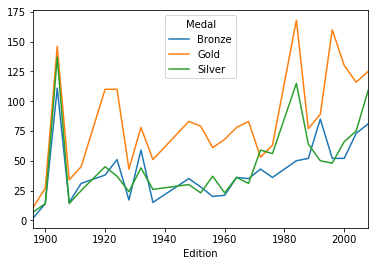

In [96]:
# Create the DataFrame: usa
usa = medals[medals['NOC']=='USA']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level="Medal")

# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot()
plt.show()

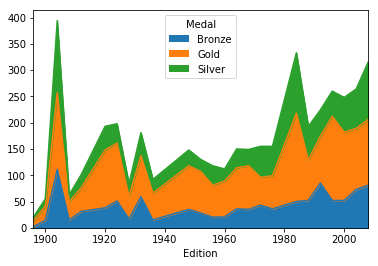

In [97]:
# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()

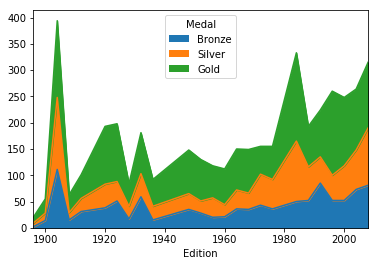

In [98]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(values = medals.Medal,categories=['Bronze', 'Silver', 'Gold'],ordered=True)

# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()